<a href="https://colab.research.google.com/github/vinicius-mattoso/LearningHub/blob/main/time_series/Diesel_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte de dados: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/vendas-de-derivados-de-petroleo-e-biocombustiveis

## Exploratory Data Analysis — Diesel Consumption

This brief EDA aims to:
- Visualize diesel consumption over time
- Compare patterns across **states** and **regions**
- Identify similarities, discrepancies and structural differences

The focus is on **visual intuition**, not detailed statistical diagnostics.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
path = "/content/vendas-anuais-de-oleo-diesel-por-municipio.csv"
df = pd.read_csv(path,sep=';')

df.head()

/tmp/ipython-input-2881835734.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,sep=';')


,ANO,GRANDE REGIÃO,UF,PRODUTO,CÓDIGO IBGE,MUNICÍPIO,VENDAS
0,1990,REGIÃO NORTE,RO,ÓLEO DIESEL,1100015,ALTA FLORESTA D'OESTE,1853283
1,1990,REGIÃO NORTE,RO,ÓLEO DIESEL,1100023,ARIQUEMES,38369222
2,1990,REGIÃO NORTE,RO,ÓLEO DIESEL,1100049,CACOAL,16574585
3,1990,REGIÃO NORTE,RO,ÓLEO DIESEL,1100288,ROLIM DE MOURA,16655510
4,1990,REGIÃO NORTE,RO,ÓLEO DIESEL,1100056,CEREJEIRAS,3466760


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182878 entries, 0 to 182877
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ANO            182878 non-null  int64 
 1   GRANDE REGIÃO  182878 non-null  object
 2   UF             182876 non-null  object
 3   PRODUTO        182878 non-null  object
 4   CÓDIGO IBGE    182878 non-null  int64 
 5   MUNICÍPIO      182878 non-null  object
 6   VENDAS         182878 non-null  object
dtypes: int64(2), object(5)
memory usage: 9.8+ MB


In [5]:
df.describe(include="all")

,ANO,GRANDE REGIÃO,UF,PRODUTO,CÓDIGO IBGE,MUNICÍPIO,VENDAS
count,182878.000000,182878,182876,182878,1.828780e+05,182878,182878.0
unique,NaN,5,27,1,NaN,10259,96593.0
top,NaN,REGIÃO SUDESTE,MG,ÓLEO DIESEL,NaN,BOM JESUS,10000.0
freq,NaN,57928,28790,182878,NaN,129,238.0
mean,2007.277141,NaN,NaN,NaN,3.303363e+06,NaN,NaN
std,10.284711,NaN,NaN,NaN,9.752290e+05,NaN,NaN
min,1990.000000,NaN,NaN,NaN,1.100015e+06,NaN,NaN
25%,1999.000000,NaN,NaN,NaN,2.608107e+06,NaN,NaN
50%,2008.000000,NaN,NaN,NaN,3.158409e+06,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,4.122503e+06,NaN,NaN


In [6]:
# Ensure numeric type for sales
df["VENDAS"] = (
    df["VENDAS"]
    .astype(str)                 # garante string
    .str.replace(".", "", regex=False)  # remove separador de milhar (se existir)
    .str.replace(",", ".", regex=False) # ajusta separador decimal (se existir)
)

df["VENDAS"] = pd.to_numeric(df["VENDAS"], errors="coerce")

In [7]:
df_diesel = df[df["PRODUTO"] == "ÓLEO DIESEL"].copy()
df_diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182878 entries, 0 to 182877
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ANO            182878 non-null  int64  
 1   GRANDE REGIÃO  182878 non-null  object 
 2   UF             182876 non-null  object 
 3   PRODUTO        182878 non-null  object 
 4   CÓDIGO IBGE    182878 non-null  int64  
 5   MUNICÍPIO      182878 non-null  object 
 6   VENDAS         182878 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 9.8+ MB


In [8]:
df_uf = (
    df_diesel
    .groupby(["ANO", "UF"], as_index=False)["VENDAS"]
    .sum()
)

df_region = (
    df_diesel
    .groupby(["ANO", "GRANDE REGIÃO"], as_index=False)["VENDAS"]
    .sum()
)

## Distribution of annual diesel sales — By state (UF)

Histograms help visualize the distribution and scale of annual diesel sales
for each state.


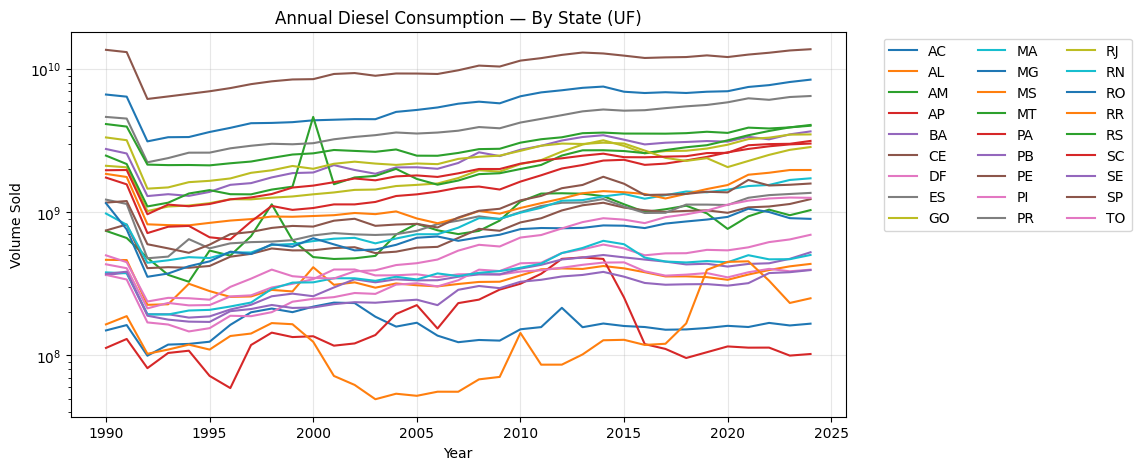

In [9]:
plt.figure(figsize=(10,5))

for uf in df_uf["UF"].unique():
    subset = df_uf[df_uf["UF"] == uf]
    plt.plot(subset["ANO"], subset["VENDAS"], label=uf)

plt.title("Annual Diesel Consumption — By State (UF)")
plt.xlabel("Year")
plt.ylabel("Volume Sold")
# plt.legend(ncol=3, fontsize='small', frameon=True)
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=3)
plt.grid(alpha=0.3)
plt.yscale('log')
plt.show()


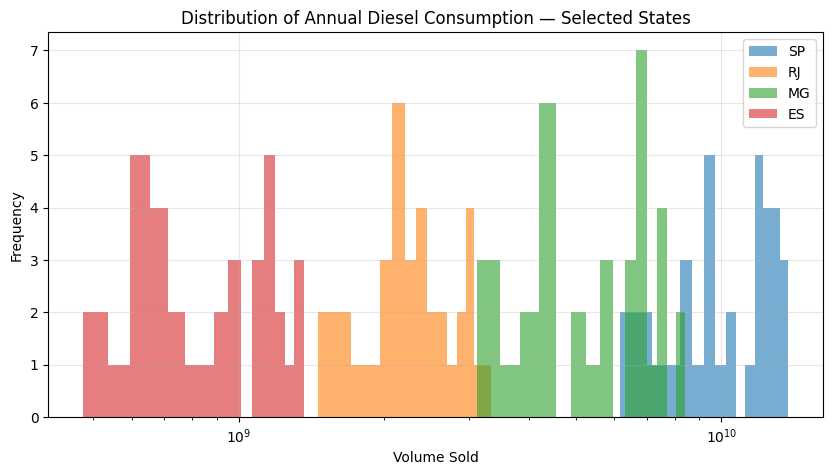

In [10]:
ufs_selected = ["SP", "RJ", "MG", "ES"]

plt.figure(figsize=(10,5))

for uf in ufs_selected:
    plt.hist(
        df_uf[df_uf["UF"] == uf]["VENDAS"],
        bins=15,
        alpha=0.6,
        label=uf
    )

plt.title("Distribution of Annual Diesel Consumption — Selected States")
plt.xlabel("Volume Sold")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.xscale("log")
plt.show()


## Diesel consumption by major region — exploratory view

Aggregating diesel sales at the macro-regional level reduces local noise and
highlights structural trends driven by economic activity, logistics and energy demand.

Because the data is annual, no seasonal pattern is expected. The analysis therefore
focuses on long-term trend behavior.

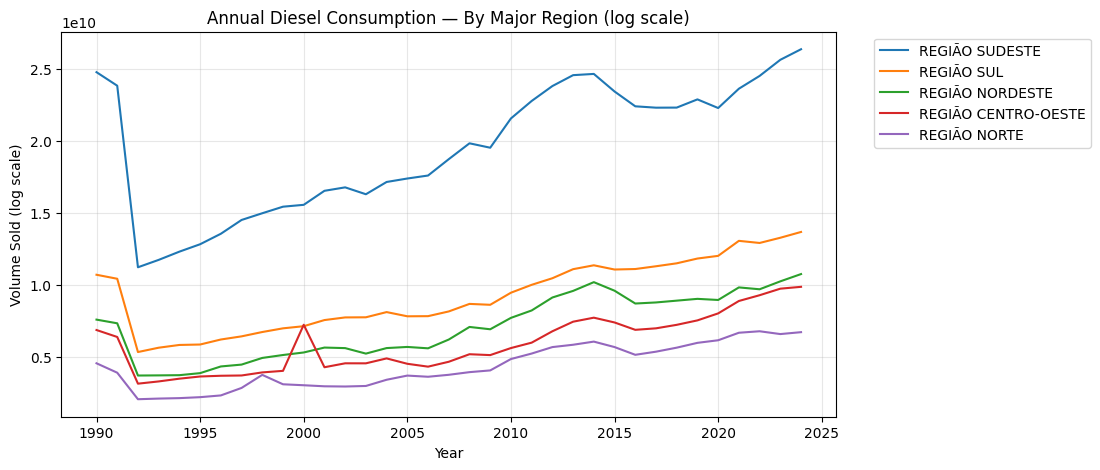

In [11]:
#Ordenar regiões por consumo médio (melhora leitura)
regions_ordered = (
    df_region.groupby("GRANDE REGIÃO")["VENDAS"]
    .mean()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(10,5))

for region in regions_ordered:
    subset = df_region[df_region["GRANDE REGIÃO"] == region]
    plt.plot(subset["ANO"], subset["VENDAS"], label=region)

plt.title("Annual Diesel Consumption — By Major Region (log scale)")
plt.xlabel("Year")
plt.ylabel("Volume Sold (log scale)")
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.grid(alpha=0.3)
# plt.yscale('log')
plt.show()

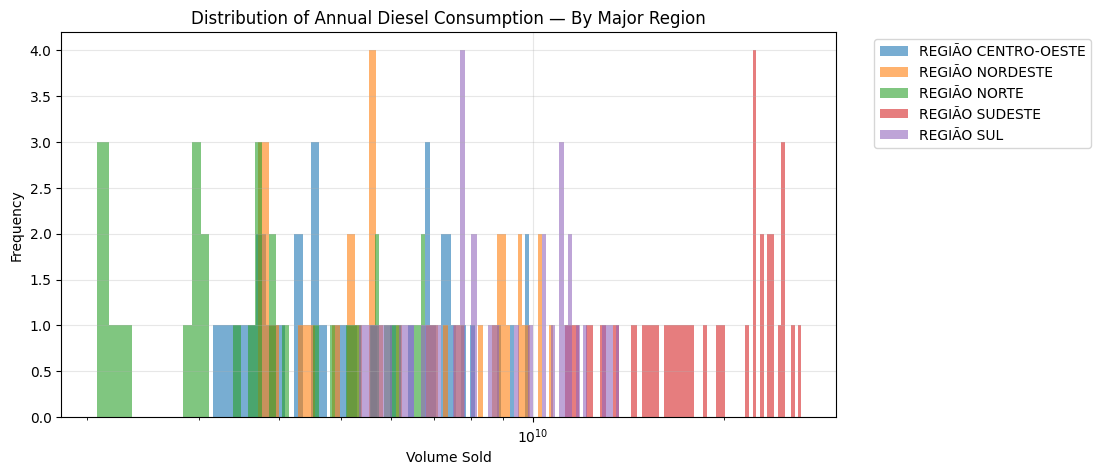

In [12]:
plt.figure(figsize=(10,5))

for region in df_region["GRANDE REGIÃO"].unique():
    plt.hist(
        df_region[df_region["GRANDE REGIÃO"] == region]["VENDAS"],
        bins=50,
        alpha=0.6,
        label=region
    )

plt.title("Distribution of Annual Diesel Consumption — By Major Region")
plt.xlabel("Volume Sold")
plt.ylabel("Frequency")
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.xscale("log")
plt.show()


### Interpretation

- All regions show a clear long-term upward trend in diesel consumption.
- The Southeast dominates absolute consumption, but other regions exhibit similar
  relative growth patterns.
- Structural breaks are visible in the early 1990s and around 2015–2016.
- The log scale reveals that growth is approximately exponential over long horizons.

These characteristics suggest that trend-based forecasting models are appropriate.


## Forecasting diesel consumption by major region

Given the annual frequency of the data and the absence of seasonality,
we apply Holt’s method (double exponential smoothing) to model:
- Level
- Trend

This approach provides a strong and interpretable baseline for long-term forecasting.


In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np


In [14]:
# Escolha inicial: começar pelo Sudeste
region_name = "REGIÃO SUL"

series_region = (
    df_region[df_region["GRANDE REGIÃO"] == region_name]
    .sort_values("ANO")
    .set_index("ANO")["VENDAS"]
)

series_region.head()


,VENDAS
ANO,
1990,1.071302e+10
1991,1.043473e+10
1992,5.346754e+09
1993,5.647436e+09
1994,5.838673e+09


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def additive_vs_multiplicative_check(s: pd.Series):
    s = s.dropna().astype(float)
    mid = len(s)//2
    early, late = s.iloc[:mid], s.iloc[mid:]

    cv_early = early.std() / early.mean()
    cv_late  = late.std()  / late.mean()

    print("Heuristic check (relative variability):")
    print(f"CV early = {cv_early:.4f}")
    print(f"CV late  = {cv_late:.4f}")
    print("\nInterpretation:")
    print("- If CV increases a lot over time -> multiplicative behavior likely (consider log).")
    print("- If CV is roughly stable -> additive errors may be acceptable.")

additive_vs_multiplicative_check(series_region)


Heuristic check (relative variability):
CV early = 0.2061
CV late  = 0.1468

Interpretation:
- If CV increases a lot over time -> multiplicative behavior likely (consider log).
- If CV is roughly stable -> additive errors may be acceptable.


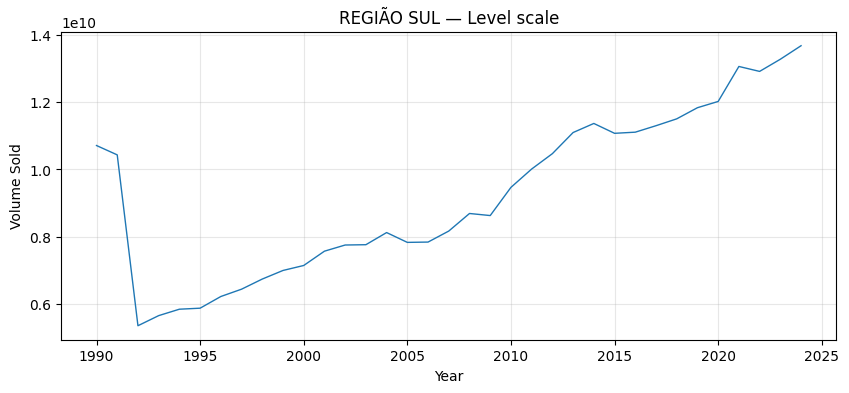

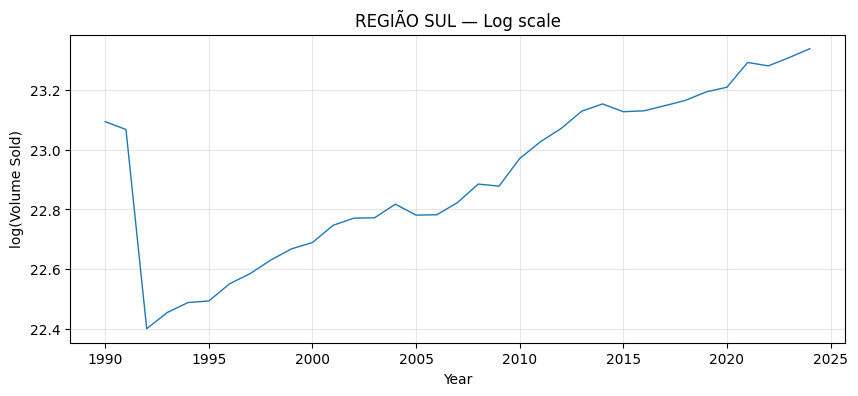

In [16]:
plt.figure(figsize=(10,4))
plt.plot(series_region.index, series_region.values, linewidth=1)
plt.title(f"{region_name} — Level scale")
plt.xlabel("Year")
plt.ylabel("Volume Sold")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(series_region.index, np.log(series_region.values), linewidth=1)
plt.title(f"{region_name} — Log scale")
plt.xlabel("Year")
plt.ylabel("log(Volume Sold)")
plt.grid(alpha=0.3)
plt.show()



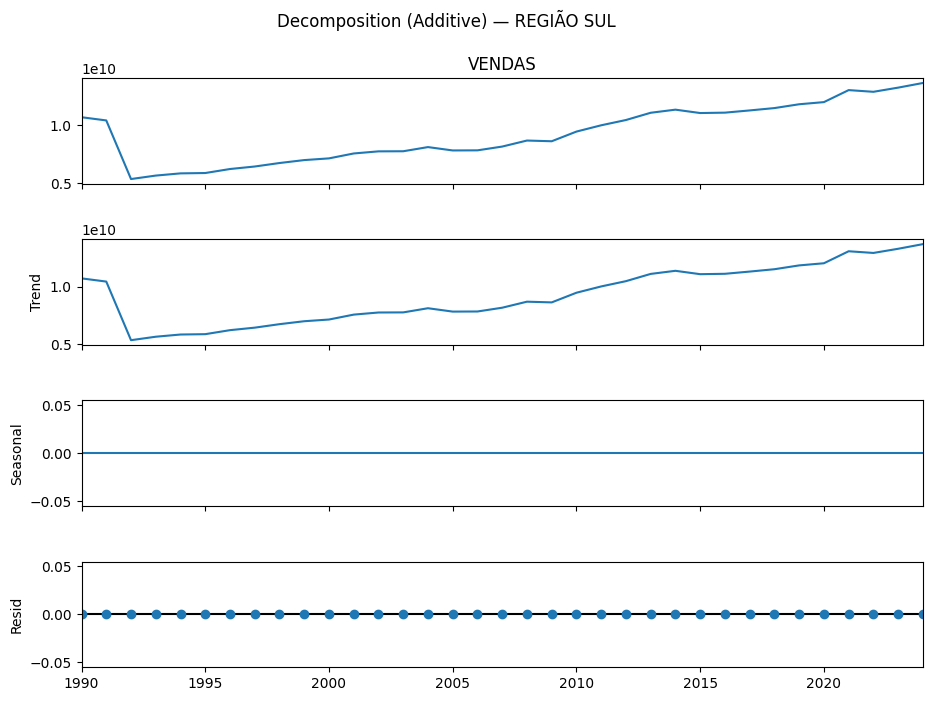

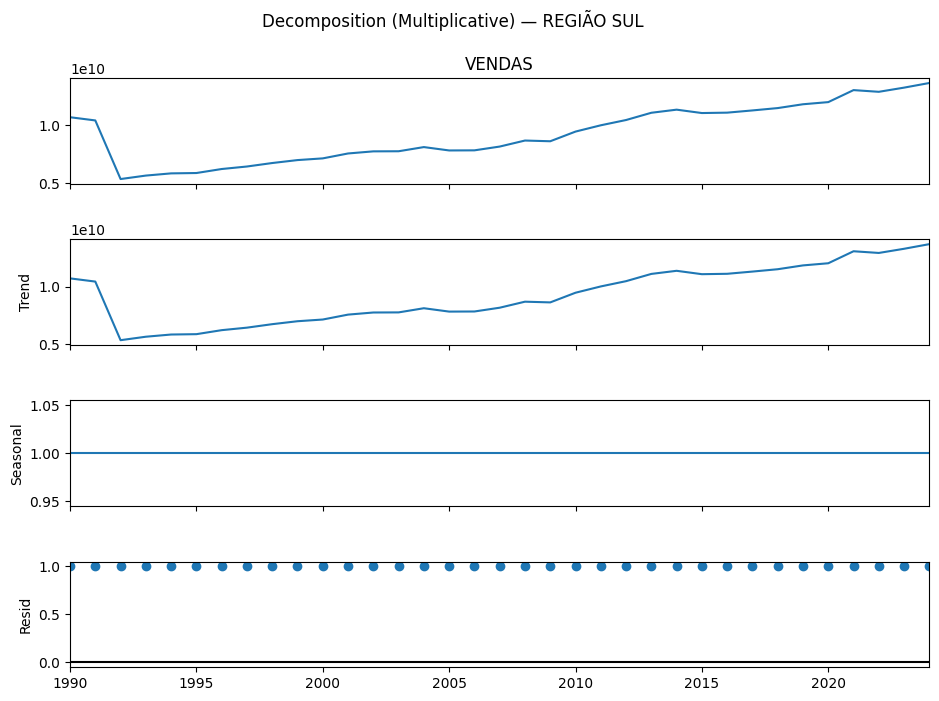

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
period = 1

decomp_add = seasonal_decompose(series_region, model="additive", period=period, extrapolate_trend="freq")
fig = decomp_add.plot()
fig.set_size_inches(10, 7)
plt.suptitle(f"Decomposition (Additive) — {region_name}", y=1.02)
plt.show()

decomp_mul = seasonal_decompose(series_region, model="multiplicative", period=period, extrapolate_trend="freq")
fig = decomp_mul.plot()
fig.set_size_inches(10, 7)
plt.suptitle(f"Decomposition (Multiplicative) — {region_name}", y=1.02)
plt.show()


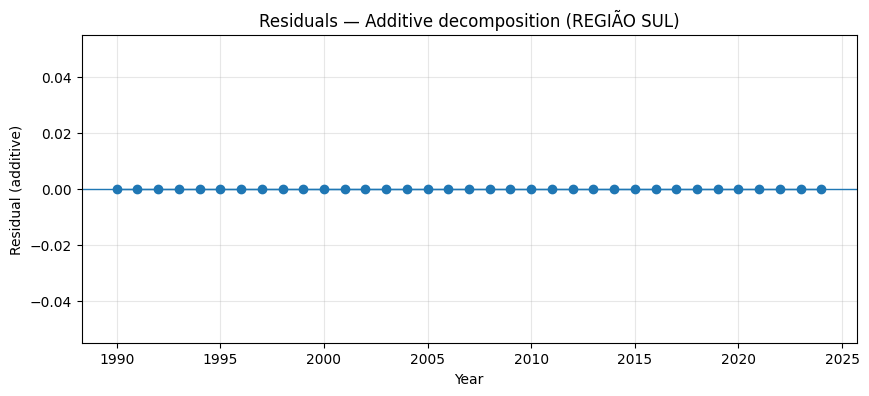

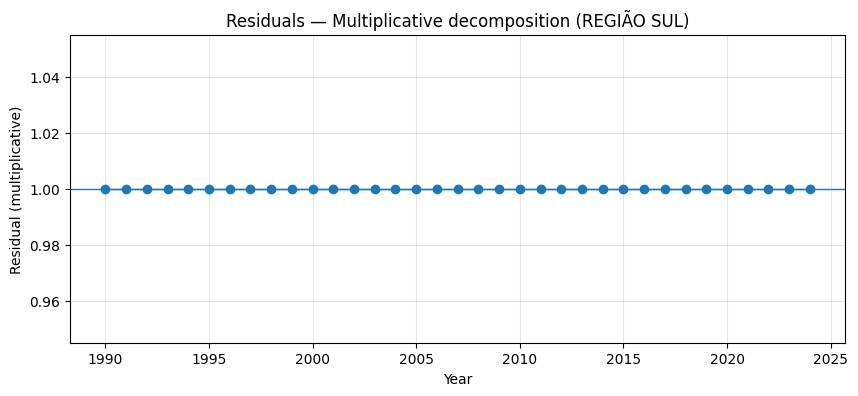

In [18]:
resid_add = decomp_add.resid.dropna()
resid_mul = decomp_mul.resid.dropna()

plt.figure(figsize=(10,4))
plt.plot(resid_add.index, resid_add.values, marker="o", linewidth=1)
plt.axhline(0, linewidth=1)
plt.title(f"Residuals — Additive decomposition ({region_name})")
plt.xlabel("Year")
plt.ylabel("Residual (additive)")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(resid_mul.index, resid_mul.values, marker="o", linewidth=1)
plt.axhline(1, linewidth=1)
plt.title(f"Residuals — Multiplicative decomposition ({region_name})")
plt.xlabel("Year")
plt.ylabel("Residual (multiplicative)")
plt.grid(alpha=0.3)
plt.show()


### Additive vs Multiplicative (rule-of-thumb)

- **Additive** is more appropriate when residual variation has a roughly constant magnitude over time.
- **Multiplicative** is more appropriate when variation scales with the series level (errors are proportional).

In practice, if the series becomes more linear in the **log scale** and the multiplicative residuals
look more stable, we prefer a multiplicative behavior assumption and may model **log(y)**.

In [19]:
y = series_region.astype(float)

print("NaN em y:", y.isna().sum())
print("Min y:", y.min())
print("Zeros em y:", (y == 0).sum())
print("Negativos em y:", (y < 0).sum())


NaN em y: 0
Min y: 5346754364.0
Zeros em y: 0
Negativos em y: 0


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


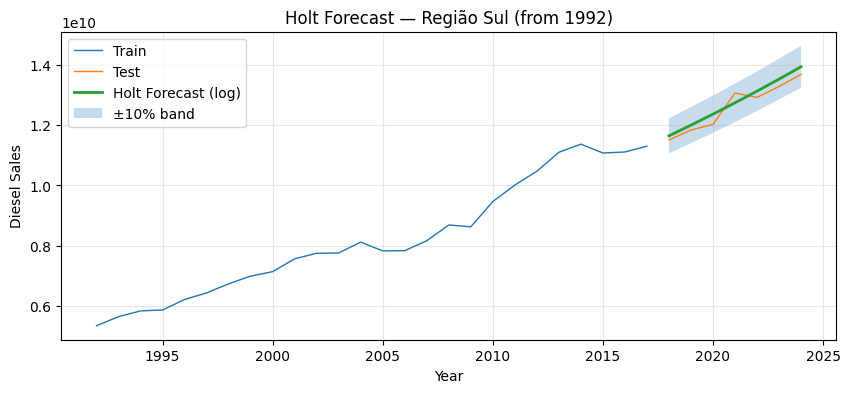

In [20]:
# Corte temporal
y = series_region[series_region.index >= 1992].astype(float)

# Log-transform
y_log = np.log(y)

# Split
train_size = int(len(y_log) * 0.8)
train_log = y_log.iloc[:train_size]
test_log  = y_log.iloc[train_size:]

# Holt
model = ExponentialSmoothing(
    train_log,
    trend="add",
    seasonal=None,
    initialization_method="estimated"
).fit()

# Forecast (ALINHADO)
pred_log = model.forecast(len(test_log))
pred_log = pd.Series(pred_log.values, index=test_log.index)

pred = np.exp(pred_log)

# Séries reais
train_level = np.exp(train_log)
test_level  = np.exp(test_log)

# Banda ±10%
band = 0.05
lower = pred * (1 - band)
upper = pred * (1 + band)

# Plot
plt.figure(figsize=(10,4))
plt.plot(train_level.index, train_level.values, label="Train", linewidth=1)
plt.plot(test_level.index, test_level.values, label="Test", linewidth=1)
plt.plot(pred.index, pred.values, label="Holt Forecast (log)", linewidth=2)
plt.fill_between(pred.index, lower.values, upper.values, alpha=0.25, label="±10% band")

plt.title("Holt Forecast — Região Sul (from 1992)")
plt.xlabel("Year")
plt.ylabel("Diesel Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Versão com o XGBoost

In [21]:
import numpy as np
import pandas as pd

y = series_region[series_region.index >= 1992].astype(float)
y_log = np.log(y)

In [22]:
df_ml = pd.DataFrame({
    "y_log": y_log
})

# Lags
for lag in [1, 2, 3]:
    df_ml[f"lag_{lag}"] = df_ml["y_log"].shift(lag)

# Tendência explícita
df_ml["t"] = np.arange(len(df_ml))

df_ml = df_ml.dropna()
df_ml.head()


,y_log,lag_1,lag_2,lag_3,t
ANO,,,,,
1995,22.492950,22.487769,22.454467,22.399756,3
1996,22.550534,22.492950,22.487769,22.454467,4
1997,22.584997,22.550534,22.492950,22.487769,5
1998,22.630843,22.584997,22.550534,22.492950,6
1999,22.668105,22.630843,22.584997,22.550534,7


In [23]:
train_size = int(len(df_ml) * 0.8)

train = df_ml.iloc[:train_size]
test  = df_ml.iloc[train_size:]

X_train = train.drop(columns="y_log")
y_train = train["y_log"]

X_test  = test.drop(columns="y_log")
y_test  = test["y_log"]


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=42)

In [25]:
pred_log = gbr.predict(X_test)
pred = np.exp(pred_log)

pred = pd.Series(pred, index=y_test.index)

In [26]:
band = 0.10
lower = pred * (1 - band)
upper = pred * (1 + band)

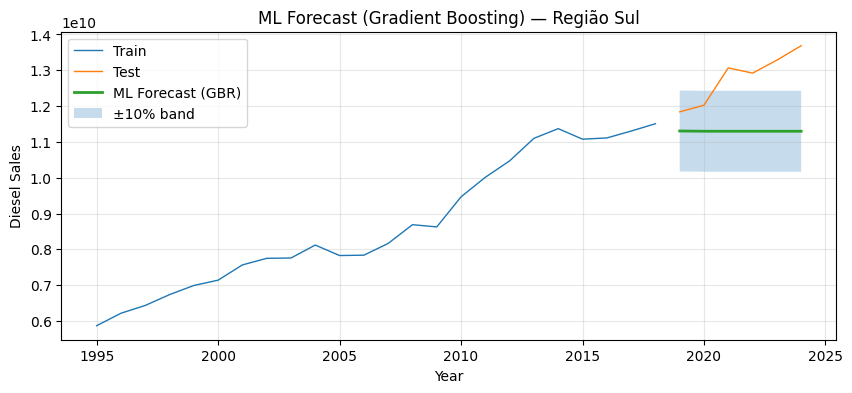

In [27]:
import matplotlib.pyplot as plt

train_level = np.exp(y_train)
test_level  = np.exp(y_test)

plt.figure(figsize=(10,4))

plt.plot(train_level.index, train_level.values, label="Train", linewidth=1)
plt.plot(test_level.index, test_level.values, label="Test", linewidth=1)

plt.plot(pred.index, pred.values, label="ML Forecast (GBR)", linewidth=2)
plt.fill_between(pred.index, lower.values, upper.values, alpha=0.25, label="±10% band")

plt.title("ML Forecast (Gradient Boosting) — Região Sul")
plt.xlabel("Year")
plt.ylabel("Diesel Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

rmse_ml = np.sqrt(mean_squared_error(test_level.values, pred.values))
rmse_ml

np.float64(1643978405.0901682)

In [30]:
import numpy as np
import pandas as pd

y = series_region[series_region.index >= 1992].astype(float)
y_log = np.log(y)

df_ml = pd.DataFrame({"y_log": y_log})

# Lags (ajuste conforme quiser)
for lag in [1, 2, 3]:
    df_ml[f"lag_{lag}"] = df_ml["y_log"].shift(lag)

# Trend features
df_ml["t"]  = np.arange(len(df_ml))
df_ml["t2"] = df_ml["t"] ** 2
df_ml["t3"] = df_ml["t"] ** 3

df_ml = df_ml.dropna()


In [31]:
train_size = int(len(df_ml) * 0.8)
train = df_ml.iloc[:train_size]
test  = df_ml.iloc[train_size:]

X_train = train.drop(columns="y_log")
y_train = train["y_log"]

X_test  = test.drop(columns="y_log")
y_test  = test["y_log"]

In [32]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42
)

xgb.fit(X_train, y_train)

pred_log = xgb.predict(X_test)
pred = np.exp(pred_log)
pred = pd.Series(pred, index=y_test.index)


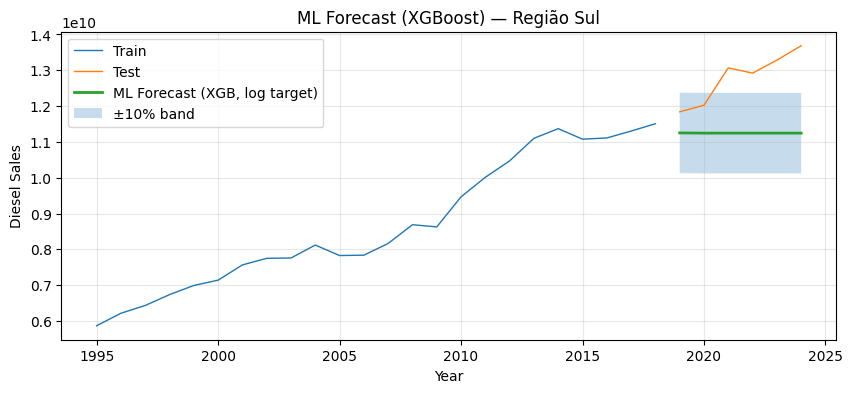

In [33]:
import matplotlib.pyplot as plt

train_level = np.exp(y_train)
test_level  = np.exp(y_test)

band = 0.10
lower = pred * (1 - band)
upper = pred * (1 + band)

plt.figure(figsize=(10,4))
plt.plot(train_level.index, train_level.values, label="Train", linewidth=1)
plt.plot(test_level.index, test_level.values, label="Test", linewidth=1)

plt.plot(pred.index, pred.values, label="ML Forecast (XGB, log target)", linewidth=2)
plt.fill_between(pred.index, lower.values, upper.values, alpha=0.25, label="±10% band")

plt.title("ML Forecast (XGBoost) — Região Sul")
plt.xlabel("Year")
plt.ylabel("Diesel Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# y: série com índice ANO (int)
y = series_region.copy()
y = y[y.index >= 1992].astype(float)

# target no log
y_log = np.log(y)

# tempo como contador (0,1,2,...)
t = np.arange(len(y_log)).reshape(-1, 1)


In [39]:
lin_reg = LinearRegression()
lin_reg.fit(t, y_log.values)

trend_log = lin_reg.predict(t)
trend = np.exp(trend_log)
trend = pd.Series(trend, index=y.index)


In [40]:
h = 5  # anos à frente

t_future = np.arange(len(y_log), len(y_log) + h).reshape(-1, 1)
forecast_log = lin_reg.predict(t_future)
forecast_vals = np.exp(forecast_log)

last_year = int(y.index.max())
future_years = np.arange(last_year + 1, last_year + h + 1)

forecast = pd.Series(forecast_vals, index=future_years)


In [41]:
band = 0.10
lower = forecast * (1 - band)
upper = forecast * (1 + band)

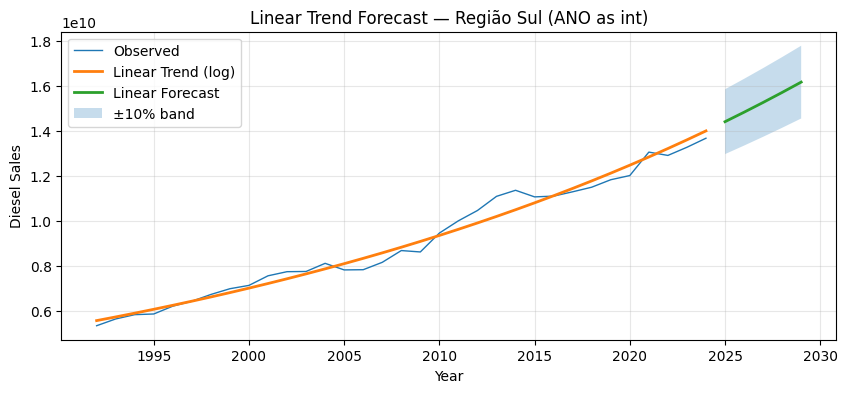

In [42]:
plt.figure(figsize=(10,4))
plt.plot(y.index, y.values, label="Observed", linewidth=1)
plt.plot(trend.index, trend.values, label="Linear Trend (log)", linewidth=2)

plt.plot(forecast.index, forecast.values, label="Linear Forecast", linewidth=2)
plt.fill_between(forecast.index, lower.values, upper.values, alpha=0.25, label="±10% band")

plt.title("Linear Trend Forecast — Região Sul (ANO as int)")
plt.xlabel("Year")
plt.ylabel("Diesel Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


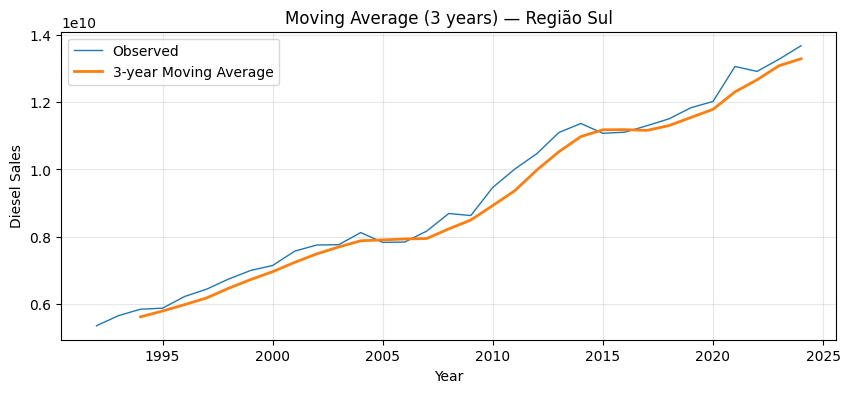

In [43]:
ma_window = 3
moving_avg = y.rolling(ma_window).mean()

plt.figure(figsize=(10,4))
plt.plot(y.index, y.values, label="Observed", linewidth=1)
plt.plot(moving_avg.index, moving_avg.values, label=f"{ma_window}-year Moving Average", linewidth=2)

plt.title(f"Moving Average ({ma_window} years) — Região Sul")
plt.xlabel("Year")
plt.ylabel("Diesel Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
